# Taxi Fare - Prediction

In [34]:
import pandas as pd
import numpy as np
from sklearn import metrics  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_fare=pd.read_csv('D:/train_fare.csv')
test_fare=pd.read_csv('D:/test_fare.csv')

In [3]:
train=taxi_fare.copy()
test=test_fare.copy()

In [4]:
train.columns, test.columns

(Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
        'month', 'day', 'dayOfWeek', 'hour', 'timeOfDayMid.Day',
        'timeOfDayMorning', 'timeOfDayNight'],
       dtype='object'),
 Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count', 'year', 'month', 'day',
        'dayOfWeek', 'hour', 'timeOfDayMid.Day', 'timeOfDayMorning',
        'timeOfDayNight'],
       dtype='object'))

In [5]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06
mean,1.061528e+01,-7.397526e+01,4.075089e+01,-7.397436e+01,4.075124e+01,1.684182e+00,3.736753e+00,6.268586e+00,1.570568e+01,4.122257e+00,1.350867e+01,2.363074e-01,1.398658e-01,4.344701e-01
std,6.787814e+00,4.479549e-02,3.424333e-02,4.329848e-02,3.716876e-02,1.306624e+00,1.863201e+00,3.437946e+00,8.682210e+00,1.988030e+00,6.513901e+00,4.248133e-01,3.468478e-01,4.956874e-01
min,3.300000e+00,-7.953506e+01,3.579768e+01,-7.948642e+01,3.556155e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399160e+01,4.073550e+01,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075333e+01,-7.398062e+01,4.075383e+01,1.000000e+00,4.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,5.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,3.027000e+01,-7.000039e+01,4.426142e+01,-7.000227e+01,4.467143e+01,9.000000e+00,7.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
dayOfWeek              int64
hour                   int64
timeOfDayMid.Day       int64
timeOfDayMorning       int64
timeOfDayNight         int64
dtype: object

In [7]:
train.shape, test.shape

((1958885, 14), (9914, 13))

In [8]:
X = train.loc[:, train.columns != 'fare_amount']
y = train['fare_amount']

In [9]:
from sklearn.model_selection import train_test_split 

#Split train set into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1567108, 13) (391777, 13) (1567108,) (391777,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Defining a Function to display model score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [13]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.1715866594784745
0.17138107395898738


In [15]:
print(regressor.intercept_),
print(regressor.coef_)

10.612094495082964
[ 1.512547   -0.90850631  1.43312972 -0.92230161  0.09643857  0.88025445
  0.27786295  0.01716398  0.00240987 -0.10109864 -0.09108535 -0.07794599
 -0.09487114]


In [16]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred1 = regressor.predict(X_train)

In [17]:
# Checking first few data predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10) 

,Actual,Predicted
678229,10.00,10.306121
1611561,24.50,12.737027
731459,6.50,11.604189
174668,20.33,12.814102
1635387,9.70,9.228704
1737463,10.90,10.317578
1464178,5.70,8.939896
760493,7.50,9.360846
590829,8.90,9.156174
1230822,13.00,12.972972


In [18]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))  

Root Mean Squared Error: 6.175469126683819


In [19]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 6.189254652925207


In [20]:
from sklearn import metrics  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 6.189254652925207


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Checking score for Linear Regression model created earlier using cross-validation
scores_lin_reg = cross_val_score(regressor, X, y, 
                         scoring="neg_mean_squared_error", cv=5)

lin_reg_rmse_scores = np.sqrt(-scores_lin_reg)

display_scores(lin_reg_rmse_scores)

Scores: [6.19884926 6.18023972 6.16343187 6.19072938 6.16029735]
Mean: 6.178709517871544
Standard deviation: 0.01499894923869124


In [23]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.725


In [24]:
y_pred_train = tree.predict(X_train)
y_pred= tree.predict(X_test)

In [40]:
y_pred

array([ 9.45, 23.6 ,  7.15, ..., 17.6 , 11.05,  5.15])

In [39]:
y_test

678229     10.00
1611561    24.50
731459      6.50
174668     20.33
1635387     9.70
1737463    10.90
1464178     5.70
760493      7.50
590829      8.90
1230822    13.00
1234501     4.50
1469739    12.90
1200567     4.90
963361      8.10
623608      4.50
927389     11.50
124540      3.70
1466422     8.50
774567      4.10
1295126     7.50
211479     10.90
84559      12.50
793444      8.00
1271794    20.00
1765145     7.70
1332438    15.00
378999      4.00
1487627     8.00
1251549    16.50
371839      8.10
           ...  
1414270    12.50
1086747     6.10
511175      5.30
840531     14.50
596536      6.00
460757      8.10
1756344     8.50
791125      6.10
88138       8.50
1745838     8.50
454806     12.10
628129      6.50
158959      8.50
1819122     6.50
702806     30.27
1528938     6.00
1693871     8.50
438798      8.90
1594300     8.00
110647     19.50
1170485     5.30
968506      7.00
1789158    25.00
1837569     5.50
483753      5.00
237156      9.00
111107      4.90
204295     13.

In [25]:

print('Train set Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

Train set Root Mean Squared Error: 0.014516210353589144


In [26]:
print('Test set Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Test set Root Mean Squared Error: 3.563071792151601


In [27]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.28736346 0.15562245 0.29809636 0.18639578 0.00402092 0.02068967
 0.00993259 0.01226498 0.00823163 0.01368163 0.00143727 0.00086159
 0.00140166]


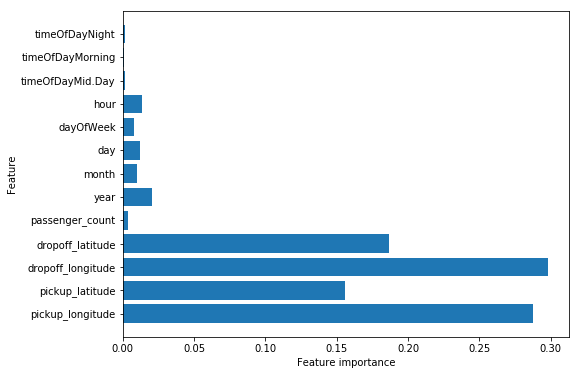

In [28]:
diabetes_features = X.columns

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [29]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

In [30]:
y_pred_train = regressor.predict(X_train)
print('Test dataset Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  

Test dataset Root Mean Squared Error: 1.095801553124151


In [31]:
print('Test dataset Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Test dataset Root Mean Squared Error: 2.5777040700742013


In [32]:
print("Feature importances:\n{}".format(regressor.feature_importances_))

Feature importances:
[0.28416208 0.16043887 0.29394449 0.19027512 0.00386964 0.02032042
 0.00965996 0.01184876 0.00793153 0.01367452 0.00144608 0.00089609
 0.00153245]


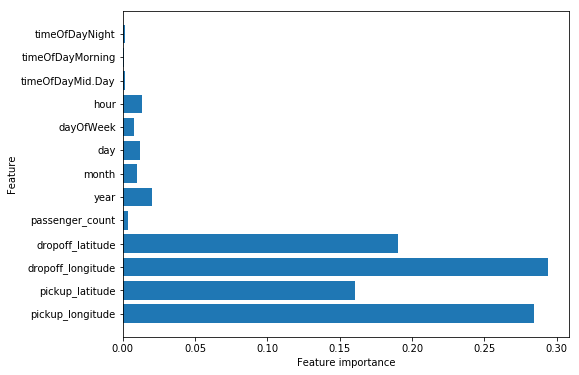

In [33]:
diabetes_features = X.columns

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(regressor)
plt.savefig('feature_importance')